## Chapter 4 Logistic Regression##   
  
### Outline ###
1. Introduction
1. Logistic Regression Model
1. Hypothesis Representation
1. Decision Boundary
1. Prediction
  
### 1. Introduction ###  
    - Regression vs Classification
    - The output is categorical
    - Example:
        - We want to know whether a tumor is benign or malignant
        - We need to know whether an email is spam or ham.
        
### 2. Logistic Regression Model ###  
  
  For a binary case, suppose we want to predict if a tumor is benign or malignant, we can simplify this case into: 
  
  $benign = 0$ and $malignant = 1$  
  
  we have $ y \in \{0|1\} $
  
### 3. Hypothesis Representation ###  
  
  In this case, we can use a sigmoid function. Thus, we have
  
  $h_\theta(x) = g(\theta^Tx)$  
  $z = \theta^Tx$  
  $g(z) = \frac{1}{1+ e^{-z}}$
  
  The function $g(z)$ represents every real number between 0 and 1. In math term, we write $ 0 \le h_\theta(x) \le 1$. $h_\theta(x)$ is the probability for an output of 1 or 0. For instance, if $h_\theta(x) = 0.7$, we have a probability 70% of getting 1. On the other hand, we have 30% chances of getting 0. So, we have:  
  
  $h_\theta(x) = P(y=1|x;\theta) = 1 - P(y=0|x;\theta)$
  
  $P(y=1|x;\theta) + P(y=0|x;\theta) = 1$
  
  Let see the visualization of a sigmoid function
  

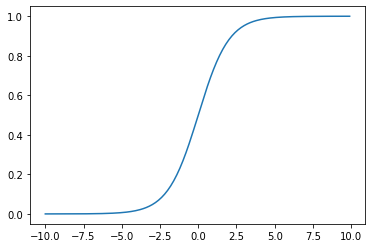

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10,10, 0.1) #  -10,-9.9,-9.8,... 9.8,9.9,10
y = sigmoid(x)

plt.plot(x,y)
plt.show()

### 4. Desicion Boundary ###  
  
  Decision boundary is a line that separates the output of the sigmoid function result where y = 0 and y = 1  
  
  In order to get this output, we can write down our function as follows:  
  
  $h_\theta(x) \ge 0.5 \to y = 1$  
  
  $h_\theta(x) < 0.5 \to y = 0$


In [1]:
import pandas as pd

df = pd.read_csv("dataset/tumor.csv")
df = df.drop('Unnamed: 32', axis=1) # kolom ini dibuang
X = df.drop(['id','diagnosis'],axis=1) # mengambil nilai variabel independen/variabel penentu nilai y/atribut
# X apakah matrix / vektor? matrix

y = df.iloc[:,1] # mengambil nilai variabel dependen/variabel yang ditentukan oleh variabel independennya

# y apakah matriks/vektor? vektor 


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
# library scikit learn / sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, test_size=0.2) 
# total data 569 data
# test_size = 0.2 artinya dataset dibagi menjadi 20% untuk testing, 80% training

clf = LogisticRegression(max_iter=1000) # max_iter = max epoch = 1000 kali epoch
clf.fit(X_train,y_train) # fit itu berisi training, validation, dan learning rate

y_pred = clf.predict(X_test) # prediksi thd test 20%


print("Actual breast cancer : ")
print(y_test.values)

print("\nPredicted breast cancer : ")
print(y_pred)

print("\nAccuracy score : %f" %(accuracy_score(y_test, y_pred) * 100))




Actual breast cancer : 
['M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'M' 'M' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'M']

Predicted breast cancer : 
['B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'M'
 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B'
 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'M' 'M' 'B' 'B' 'M'
 'M' 'M' 'B' 'B' 'B' 'M']

Accuracy score : 92

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
